<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Fourteenth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [584]:
# Problem 1
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
#X = pd.DataFrame(data.data, columns=(['sepal length (cm)', 'petal length (cm)'], low_memory = True))
X.head()
y = pd.DataFrame(data.target, columns=(['species']))
y.head()
df = pd.concat([X, y], axis=1)
s = df.iloc[:,0] #column sepal length location
f = df.iloc[:,2] #column petal length location
v = df.iloc[:,4] #column species location
df1 = pd.concat([s, f, v], axis=1)
a_3 = df1.loc[df1['species'] != 0]# Eiminate sertosa
a_3

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


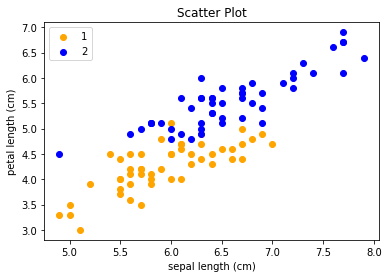

In [585]:
# Problem 2(a)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = ['orange', 'blue']
species = [1,2]
for i in range(2):
  x = a_3[a_3['species']== species[i]]
  plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label= species[i])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title('Scatter Plot')
plt.legend() 

{'boxes': [<matplotlib.lines.Line2D at 0x7fe4f65a9590>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4f5fae110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4f52d22d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4f62add90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe4f515b890>,
  <matplotlib.lines.Line2D at 0x7fe4f5eddc10>]}

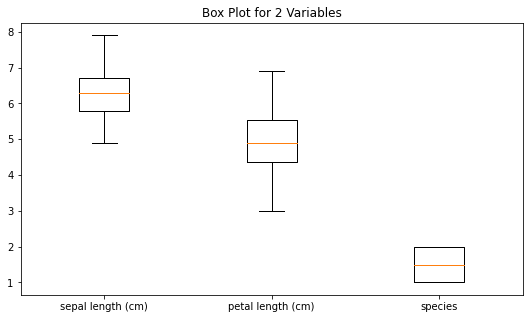

In [586]:
# Problem 2(b)
plt.figure(figsize=(9,5))
plt.title('Box Plot for 2 Variables')
plt.boxplot(a_3.values,labels=['sepal length (cm)', 'petal length (cm)', 'species'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fe4f59e6bd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fe4f3fb93d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fe4f59e6310>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7fe4f4751210>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fe4f3fb9a50>}

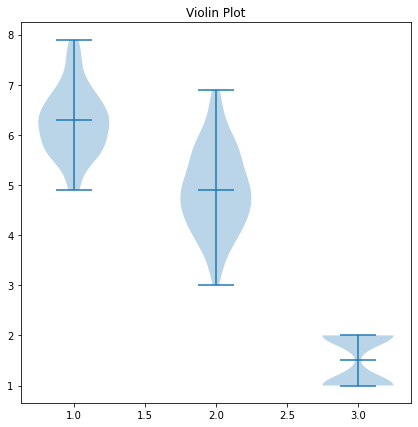

In [587]:
# Problem 2(c)
plt.figure(figsize=(7,7))
plt.title('Violin Plot')
plt.violinplot(a_3.values,showmedians=True)

In [588]:
# Problem 3
from sklearn.model_selection import train_test_split
# train -75%
# test -25%
X = a_3.drop(columns=['species'])
Y = a_3['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)


In [589]:
# Problem 4
from sklearn.preprocessing import StandardScaler
# data = a_3
# scaler = StandardScaler()
# a_4 = scaler.fit(data)
# StandardScaler()
# print(scaler.mean_)
#a_5 = scaler.transform(data)
#a_5

In [590]:
x_train_transf = scaler.fit_transform(x_train)
x_test_transf = scaler.fit_transform(x_test)

In [591]:
# Problem 5
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)


In [592]:
#model.fit(x_train, y_train) 
model.fit(x_train_transf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [593]:
print(model.predict(x_test_transf))
preds = model.predict(x_test_transf)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]


In [594]:
print(model.predict_proba(X))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [595]:
# print metric to get performance
#print("Accuracy:", model.score(x_test, y_test)*100)
print("Accuracy:", model.score(x_test_transf, y_test)*100)

Accuracy: 84.0


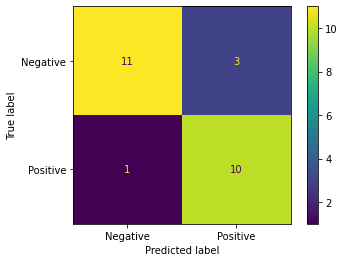

In [596]:
# Problem 6
# print metric to get performance
from sklearn.metrics import precision_score
from sklearn import metrics 
preds = model.predict(x_test_transf)
metrics.plot_confusion_matrix(model, x_test_transf, y_test, display_labels=['Negative', 'Positive'])

In [597]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([11,  3,  1, 10])

In [598]:
# Accuracy Measure
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.84

In [599]:
# Precision Measure
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=2)
precision_positive, precision_negative

(0.9166666666666666, 0.7692307692307693)

In [600]:
# Recall Measure
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=2)
recall_sensitivity, recall_specificity

(0.7857142857142857, 0.9090909090909091)

In [601]:
# F1-score Measure
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=2)
f1_positive, f1_negative

(0.8461538461538461, 0.8333333333333333)

(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

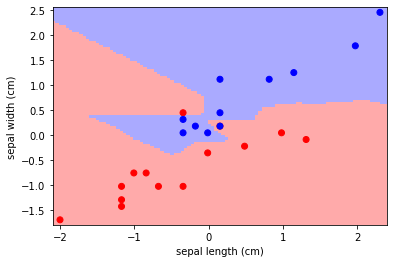

In [602]:
# problem 7
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
iris= load_iris()

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
#y = h1.iloc[:, 2]

#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                       # avoid this ugly slicing by using a two-dim dataset
#y = iris.target


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
#c=25

# Plot also the training points
plt.scatter(x_test_transf[:,0], x_test_transf[:,1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [603]:
#model training
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

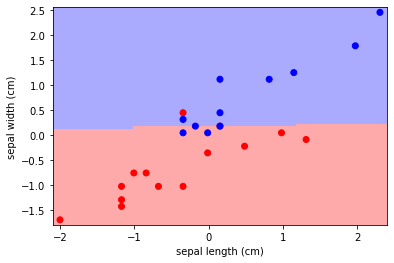

In [604]:
# Problem 8(a)
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [605]:
# print metric to get performance
print("Accuracy:", model.score(x_test_transf, y_test)*100)

Accuracy: 84.0


(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

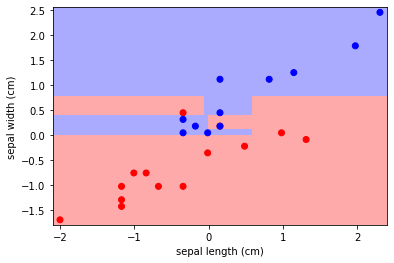

In [606]:
# Problem 8(b)
# decission tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [607]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [608]:
# print metric to get performance
print("Accuracy:", model2.score(x_test, y_test)*100)

Accuracy: 84.0


(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

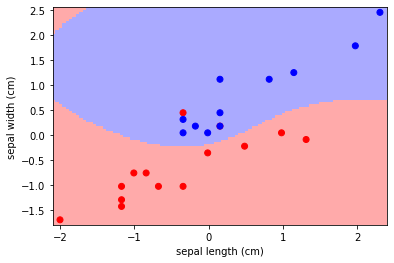

In [609]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_test_transf, y_test)
x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

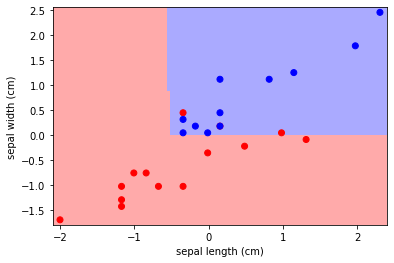

In [610]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
y = h1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(x_test_transf, y_test)
x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

SVC evidently give us better results from the graphs.
The standardised values offer better segmentation as compared to the unstanderdised data.

(4.2, 8.0, 0.9, 7.0)

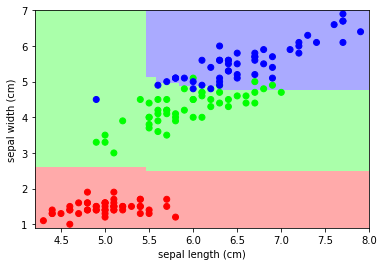

In [611]:
# Problem 10
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
X =pd.concat([i, k], axis=1)
y = df1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X, y)
x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')